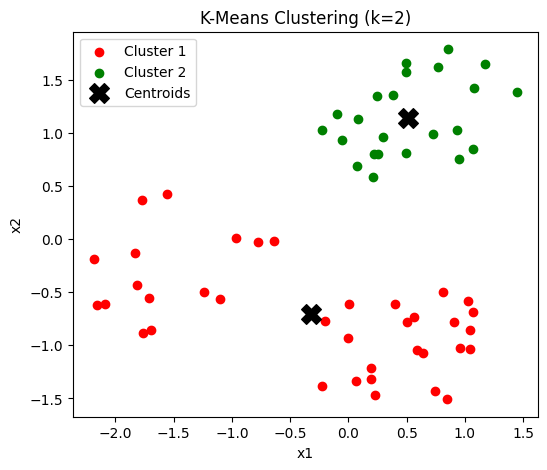

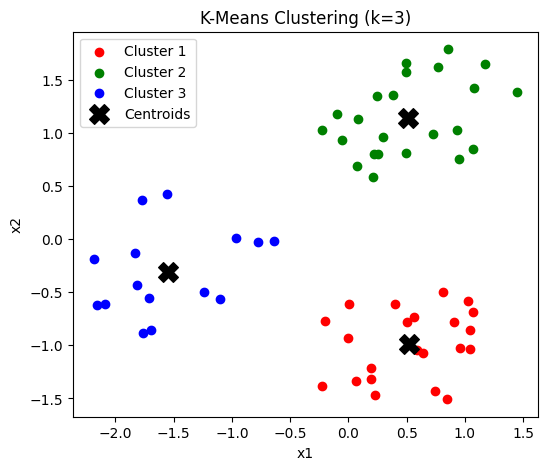

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset from CSV
def load_data(filename):
    df = pd.read_csv(filename)
    data = df[['x1', 'x2']].values
    scaler = StandardScaler()
    return scaler.fit_transform(data)

def initialize_centroids(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False)]

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

def k_means(data, k, max_iters=1000, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels

def plot_clusters(data, labels, centroids, k):
    cluster_colors = ['r', 'g', 'b']  # Red, Green, Blue
    plt.figure(figsize=(6, 5))
    
    for i in range(k):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], 
                    c=cluster_colors[i], label=f'Cluster {i+1}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                c='black', marker='X', s=200, label='Centroids')  # Black centroids
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title(f'K-Means Clustering (k={k})')
    plt.show()

# Load data from CSV file (same folder as .ipynb file)
data = load_data('kmeans - kmeans_blobs.csv')

# Perform K-Means clustering
for k in [2, 3]:
    centroids, labels = k_means(data, k)
    plot_clusters(data, labels, centroids, k)
